<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [79]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [80]:
breast_cancer_csv = 'data/breast-cancer-wisconsin-data.csv'
cancer = pd.read_csv(breast_cancer_csv)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [81]:
# Drop id and unnamed columns
cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [82]:
# Check for null values and datatypes
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

No null values, all datatypes fit

In [83]:
# Only need to change 'diagnosis' to a binary
cancer.diagnosis = cancer.diagnosis.apply(lambda x: True if x == 'M' else False)

print(cancer.diagnosis.dtypes)

cancer.diagnosis.value_counts()

bool


False    357
True     212
Name: diagnosis, dtype: int64

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [84]:
# ANSWER
y = cancer.diagnosis

print('The classes in the diagnoses are as follows:\n', y.value_counts())

The classes in the diagnoses are as follows:
 False    357
True     212
Name: diagnosis, dtype: int64


### 4. What is the baseline accuracy?

In [85]:
# ANSWER
# Basesline accuracy is a 50/50 guess on each variable, ie. 50%

### 5. Choose features to be your predictor variables and set up your X.

In [86]:
# ANSWER
# Select Features
X_unscaled = cancer.drop('diagnosis', axis=1)

#Scale features
X = StandardScaler().fit_transform(X_unscaled)




### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [89]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
model1 = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
model1_fit = model1.fit(X_unscaled,y)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [93]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
model1_predicted = model1_fit.predict(X_unscaled)

# Display accuracy
sklearn.metrics.accuracy_score(y, model1_predicted)

1.0

It is better than a 50/50 guess, as it is purportedly 100% accurate
<br><br>
It is illegitimate due to the prediction being performed on the fitted data - the model is overfitted

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [96]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.2, random_state=13)
# STEP 2: train the model on the training set (using K=1)
model1_fit2 = model1.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
model1_predicted2 = model1_fit2.predict(X_test)
sklearn.metrics.accuracy_score(y_test, model1_predicted2)

0.8859649122807017

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [98]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
model2 = KNeighborsClassifier(n_neighbors=X_train.shape[0])
# Fit Train Data
model2_fit = model2.fit(X_train, y_train)

# Print accuracy_score
model2_predicted = model2_fit.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, model2_predicted))

0.6842105263157895


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [100]:
# ANSWER
# plot test accuracy by number of neighbors:

# Create list with all K values
K_vals = range(1,X_train.shape[0])
# Initiate empty list
accuracy = []

# Fit KNN over cluster range with a for loop
for i in K_vals:
    model_fit = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_predict = model_fit.predict(X_test)
    accuracy.append(sklearn.metrics.accuracy_score(y_test, y_predict))



Text(0, 0.5, 'Model accuracy score')

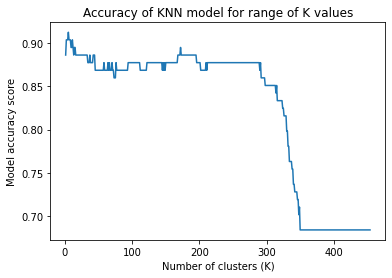

In [101]:
# Plot results
plt.plot(K_vals, accuracy)
plt.title('Accuracy of KNN model for range of K values')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Model accuracy score')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [106]:
# ANSWER
# Import cross validation scorer
from sklearn.model_selection import cross_val_score
# Initiate empty list
cross_val_acc = []

# Fit KNN over cluster range with a for loop
for i in K_vals:
    accuracy_array = cross_val_score(KNeighborsClassifier(n_neighbors=i), X=X_unscaled, y=y)
    cross_val_acc.append(np.mean(accuracy_array))

Text(0, 0.5, 'Model cross_val accuracy score')

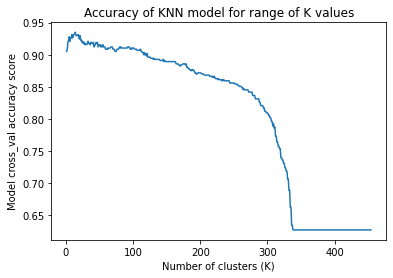

In [107]:
# Plot results
plt.plot(K_vals, cross_val_acc)
plt.title('Accuracy of KNN model for range of K values')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Model cross_val accuracy score')

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [109]:
# ANSWER
# Standarize X
X = StandardScaler().fit_transform(X_unscaled)

In [111]:
# Initiate empty list
cross_val_acc_scaled = []

# Fit KNN over cluster range with a for loop
for i in K_vals:
    accuracy_array = cross_val_score(KNeighborsClassifier(n_neighbors=i), X=X_unscaled, y=y)
    cross_val_acc_scaled.append(np.mean(accuracy_array))

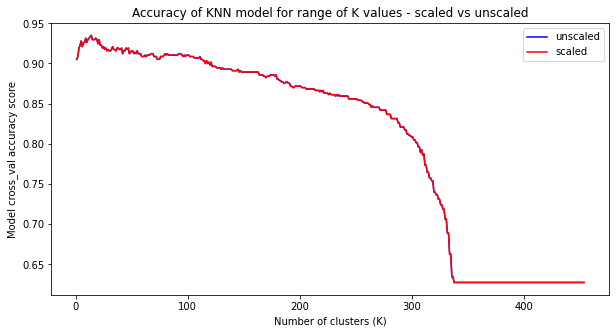

In [116]:
# ANSWER
# plot test accuracy by number of neighbors:
plt.figure(figsize=(10,5))
plt.plot(K_vals, cross_val_acc, color='b')
plt.plot(K_vals, cross_val_acc_scaled, color='r')
plt.title('Accuracy of KNN model for range of K values - scaled vs unscaled')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Model cross_val accuracy score')
plt.legend(['unscaled', 'scaled'])

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



